# CNN classification on MNIST Dataset

### What is CNN?

##### Convolutional Neural Networks (CNNs) are a type of deep learning model designed to process data that has a grid-like topology, such as images. They are particularly effective for image classification and recognition tasks. CNNs use convolutional layers to extract spatial features from images by applying filters that detect patterns such as edges, textures, or shapes. Key components of CNNs include convolutional layers, pooling layers for dimensionality reduction, and fully connected layers for classification. This architecture makes CNNs highly efficient at capturing spatial and hierarchical features in images, making them suitable for computer vision applications.

### What is the MNIST Dataset?

##### The MNIST dataset is a benchmark dataset in the field of machine learning and computer vision, widely used for training and evaluating models for handwritten digit recognition. It consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28x28 pixels. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images. Each image is labeled with the corresponding digit it represents, making it a supervised learning dataset. MNIST's simplicity and relatively small size make it an excellent starting point for experimenting with deep learning algorithms such as CNNs.

In [1]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [2]:
# from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import backend as k

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


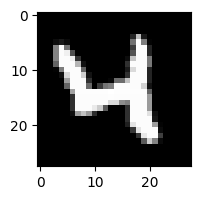

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#x_train.shape
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[20],cmap='gray')
plt.show()

In [4]:
xtrain=x_train[:6000]
ytrain=y_train[:6000]
xtest=x_test[:500]
ytest=y_test[:500]

In [5]:
xtrain.shape
xtrain1=xtrain.reshape(6000,28,28,1)
xtest1=xtest.reshape(500,28,28,1)

In [6]:
ytrain1 = keras.utils.to_categorical(ytrain)
ytest1 = keras.utils.to_categorical(ytest)
print(ytrain[0])
print(ytrain1[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

C:\Users\Suvadip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
model.summary()
model.fit(xtrain1, ytrain1, validation_data=(xtest1,ytest1), epochs=50, batch_size=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,394 (79.66 KB)

 Trainable params: 20,394 (79.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6533 - loss: 3.7489 - val_accuracy: 0.8260 - val_loss: 0.6284
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8998 - loss: 0.3535 - val_accuracy: 0.8920 - val_loss: 0.3811
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9281 - loss: 0.2698 - val_accuracy: 0.9280 - val_loss: 0.3075
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9415 - loss: 0.2304 - val_accuracy: 0.9180 - val_loss: 0.2131
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9553 - loss: 0.1642 - val_accuracy: 0.9380 - val_loss: 0.1620
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9612 - loss: 0.1421 - val_accuracy: 0.9280 - val_loss: 0.2715
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9646 - loss: 0.1473 - val_accuracy: 0.9540 - val_loss: 0.2147
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9565 - loss: 0

In [9]:
score = model.evaluate(xtest1, ytest1, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 1.9459421634674072
accuracy= 0.9480000138282776


In [10]:
predy1= model.predict(xtest1)
ytest1[:5]
predy1[:5].round()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
ytest1=np.argmax(ytest1,axis=1)
predy1=np.argmax(predy1.round(),axis=1)
cf=confusion_matrix(ytest1,predy1)
print(cf)

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  1  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  2 40  0  0  0  2  0  1]
 [ 0  0  0  0 50  0  1  1  1  2]
 [ 0  0  0  0  0 48  2  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  1  1  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  1  2  0 36  1]
 [ 0  0  0  0  3  2  0  1  1 47]]


In [13]:
print(classification_report(ytest1,predy1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.99      0.99      0.99        67
           2       0.95      1.00      0.97        55
           3       1.00      0.89      0.94        45
           4       0.94      0.91      0.93        55
           5       0.92      0.96      0.94        50
           6       0.90      1.00      0.95        43
           7       0.92      0.96      0.94        49
           8       0.95      0.90      0.92        40
           9       0.92      0.87      0.90        54

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

